In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np #importamos las librerias 
import os 
import re 
import matplotlib.pyplot as plt
from skimage.transform import resize 

In [ ]:
Raiz=os.getcwdb() #vemos la dirección actual
print(Raiz)
dic_actual=os.chdir('/content/drive/My Drive/Cactus_aum1/') #nos colocamos en cactus
print(os.getcwdb())
especies=os.listdir(dic_actual)
print(especies)

b'/content'
b'/content/drive/My Drive/Cactus_aum1'
['pelecyphora_aselliformis_aum1', 'mammillaria_bocasana_aum1', 'lophophora_williamsii__aum1']


In [ ]:
#forma manual
car_act=os.chdir('/content/drive/My Drive/Cactus_aum1/' + especies[0]) #nos colocamos dentro de la ruta 
car_act=os.listdir(car_act) #leemos los arcihvos 
imagenes=[] #creamos una matriz
for j in range(len(car_act)): #imagen por imagen 
    img_rocas = plt.imread(car_act[j]) #leemos la imagen 
    imagenes.append(img_rocas) ##agregamos la imagen a la matriz 
img1=imagenes[:280] #las guardamos en una variable 
print('Numero total de imaganes:',len(img1)) 
print('Dimencion de las imagenes:',imagenes[0].shape)
#img1=imagenes[:500] #las guardamos en una variable 
car_act=os.chdir('/content/drive/My Drive/Cactus_aum1/' + especies[1]) #nos colocamos dentro de la ruta 
car_act=os.listdir(car_act) #leemos los arcihvos 
imagenes=[] #creamos una matriz
for j in range(len(car_act)): #imagen por imagen 
    img_rocas = plt.imread(car_act[j]) #leemos la imagen 
    imagenes.append(img_rocas) ##agregamos la imagen a la matriz
img2=imagenes#[:380] #las guardamos en una variable 
print('Numero total de imaganes:',len(img2)) 
print('Dimencion de las imagenes:',imagenes[1].shape)

#forma manual
car_act=os.chdir('/content/drive/My Drive/Cactus_aum1/' + especies[2]) #nos colocamos dentro de la ruta 
car_act=os.listdir(car_act) #leemos los arcihvos 
imagenes=[] #creamos una matriz
for j in range(len(car_act)): #imagen por imagen 
    img_rocas = plt.imread(car_act[j]) #leemos la imagen 
    imagenes.append(img_rocas) ##agregamos la imagen a la matriz 
img3=imagenes#[:380] #las guardamos en una variable 
print('Numero total de imaganes:',len(img3)) 
print('Dimencion de las imagenes:',imagenes[2].shape)


Numero total de imaganes: 280
Dimencion de las imagenes: (300, 300, 3)
Numero total de imaganes: 609
Dimencion de las imagenes: (300, 300, 3)
Numero total de imaganes: 594
Dimencion de las imagenes: (300, 300, 3)


In [ ]:
img_total=img1+img2+img3
print('Numero total de imaganes:', len(img_total),'Dimenciones de las imaganes:',img_total[0].shape)
et_1=[0]*len(img1) #agregamos una lista de longitud de las imagenes de los tipos de rocas
et_2=[1]*len(img2)
et_3=[2]*len(img3)
etiquetas=et_1+et_2+et_3 #+et_4+et_5+et_6#sumamos las etiquetas
print('Numero total de etiquetas:', len(etiquetas),'tipos de etiquetas:',list(dict.fromkeys(etiquetas)),
        'etiquetas vs img:',len(etiquetas)==len(img_total))

Numero total de imaganes: 1483 Dimenciones de las imaganes: (300, 300, 3)
Numero total de etiquetas: 1483 tipos de etiquetas: [0, 1, 2] etiquetas vs img: True


In [ ]:
y = np.array(etiquetas)
x = np.array(img_total)
classes = np.unique(y) #Arreglo de 0 a 2
dic = {0:'pelecyphora_aselliformis',
       1:'mammillaria_bocasana',
       2:'Lophophora_Williamsii',}

In [ ]:
from sklearn.model_selection import train_test_split #creamos los conjuntos de test y entrenamiento 
#con el 20% de imagenes de test y acomodamos al azar el test y prueba 
x_entre,x_test,y_entre,y_test = train_test_split(x,y,test_size=0.25) 

print('dimenciones datos de entrenamiento : ', x_entre.shape, y_entre.shape)
print('dimenciones de datos de test: ', x_test.shape, y_test.shape)
#Normalizamos nuestras muentras de entrenamiento 
x_entre = x_entre/255
x_test = x_test/255
#x_entre[index][:1]

dimenciones datos de entrenamiento :  (1112, 300, 300, 3) (1112,)
dimenciones de datos de test:  (371, 300, 300, 3) (371,)


In [ ]:
#nos tomamos una parte solamente 

In [ ]:
from tensorflow.keras.utils import to_categorical #importamos para nuestras salidas de la red 

y_entre_hot = to_categorical(y_entre)
y_test_hot = to_categorical(y_test)

In [ ]:
dic_actual=os.chdir('/content/drive/My Drive/')
print(os.getcwdb())

b'/content/drive/My Drive'


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
#La función de activación softmax siempre se utiliza para la clasificación cuando el número (K) de clases es mayor que dos:

In [ ]:
def arquitectura_modelo(activation,input_shape,num_classes,dropout):
    model = Sequential()
    model.add(keras.layers.Conv2D(32,(2,2), activation = activation, input_shape = input_shape))
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(dropout))
    model.add(keras.layers.Conv2D(32,(2,2), activation = activation, input_shape = input_shape))
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(dropout)) 
    model.add(keras.layers.Conv2D(64,(2,2), activation = activation))
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(dropout)) 
    model.add(keras.layers.Conv2D(128,(2,2), activation = activation))
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(dropout)) 
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(320, activation=activation))
    model.add(keras.layers.Dense(num_classes, activation='softmax')) 
    return model

In [ ]:
activation = 'relu'
input_shape=(300,300,3)
num_classes=3
dropout=.25
modelo_1=arquitectura_modelo(activation,input_shape,num_classes,dropout)

In [ ]:
optimizer='Adam'
optimizer=optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
modelo_1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="logs/cactus_aum1", histogram_freq=1) 

In [ ]:
history = modelo_1.fit(x_entre,
                       y_entre_hot,
                       batch_size=10,
                       epochs=28,
                       callbacks=[tensorboard_callback],
                       validation_split=0.2,
                       verbose=1)

Epoch 1/28
89/89 [==============================] - 14s 81ms/step - loss: 1.2824 - accuracy: 0.3971 - val_loss: 1.0658 - val_accuracy: 0.3991
Epoch 2/28
89/89 [==============================] - 5s 51ms/step - loss: 1.0519 - accuracy: 0.4274 - val_loss: 1.0341 - val_accuracy: 0.4619
Epoch 3/28
89/89 [==============================] - 5s 54ms/step - loss: 1.0063 - accuracy: 0.4814 - val_loss: 1.0084 - val_accuracy: 0.5067
Epoch 4/28
89/89 [==============================] - 6s 63ms/step - loss: 0.9387 - accuracy: 0.5534 - val_loss: 0.9151 - val_accuracy: 0.5919
Epoch 5/28
89/89 [==============================] - 6s 68ms/step - loss: 0.7758 - accuracy: 0.6479 - val_loss: 0.8423 - val_accuracy: 0.6502
Epoch 6/28
89/89 [==============================] - 6s 63ms/step - loss: 0.6654 - accuracy: 0.7267 - val_loss: 0.7112 - val_accuracy: 0.6906
Epoch 7/28
89/89 [==============================] - 6s 67ms/step - loss: 0.5576 - accuracy: 0.7784 - val_loss: 0.7069 - val_accuracy: 0.6951
Epoch 8/28
8

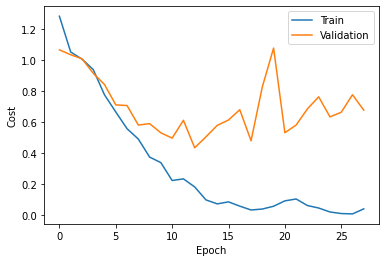

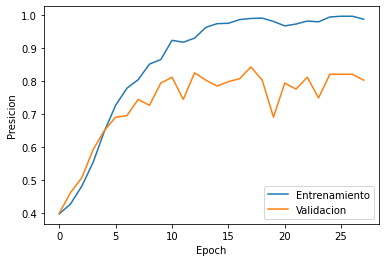

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Presicion')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validacion'], loc='lower right')
plt.show()


In [ ]:
evaluations = modelo_1.evaluate(x = x_test, y =y_test_hot)

print ("Perdida = " + str(evaluations[0]))
print ("Test presicón = " + str(evaluations[1]))


12/12 [==============================] - 0s 30ms/step - loss: 1.0391 - accuracy: 0.7790
Perdida = 1.0390560626983643
Test presicón = 0.7789757251739502


In [ ]:
evaluations = modelo_1.evaluate(x = x_test[:20], y = y_test_hot[:20])

print ("Perdida = " + str(evaluations[0]))
print ("Test presición = " + str(evaluations[1]))

1/1 [==============================] - 0s 39ms/step - loss: 1.2037 - accuracy: 0.6500
Perdida = 1.2036820650100708
Test presición = 0.6499999761581421


In [ ]:
# Predecir la imagen asociada a cada muestra en el conjunto de prueba (X_test)
predictions = modelo_1.predict(x_test)

In [ ]:
index = 10
prediction = np.argmax(predictions[index])

print('indice de imagen del test:', index, 'la prediccion es:', dic[prediction])

indice de imagen del test: 10 la prediccion es: mammillaria_bocasana


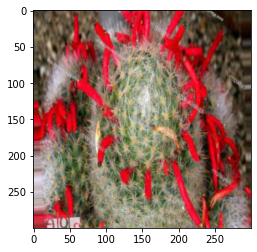

indice del diccionario: 1 Corresponde a: mammillaria_bocasana


In [ ]:
plt.imshow(x_test[index])
plt.show()
print('indice del diccionario:', y_test[index],'Corresponde a:',dic[y_test[index]] )